In Python, conditionals are used to control the flow of a program by executing certain code blocks based on whether a condition evaluates to True or False. They are a fundamental part of programming and essential for decision-making.

Conditionals in Python include:

* if statement: Used to test a condition and execute a block of code if it evaluates to True.

* elif statement: Stands for "else if", and allows checking additional conditions if the previous if condition fails.

* else statement: Executes a block of code if none of the preceding conditions are True.

Advanced conditionals go beyond simple comparisons and often involve:

* Multiple Conditions: Using logical operators like and, or, not to combine conditions.
* Nested Conditionals: Placing conditionals inside other conditionals for more complex decision structures.



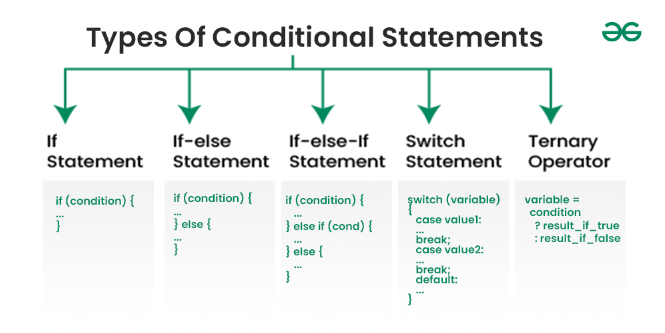

**Ex 1 :** A company wants to determine bonuses for employees based on the following rules:

If the employee has worked for 10+ years OR has completed 50+ projects, they receive a 20% bonus.

If they have worked for 5+ years AND completed 20+ projects, they receive a 10% bonus.

If they have worked for 3+ years OR completed 10+ projects, they receive a 5% bonus.

Otherwise, they receive no bonus.
Write a function calculate_bonus(years_worked, projects_completed, salary) that returns the bonus amount.

In [4]:
def Cal_bonus(years_worked, projects_completed, salary):
  if years_worked >= 10 or projects_completed >= 50 :
    bonus = salary * 0.2
  elif years_worked>= 5 and projects_completed >= 20:
    bonus = salary * 0.1
  elif years_worked >= 3 or projects_completed >= 10:
    bonus = salary * 0.05
  else:
    bonus = 0
  return bonus

print("This worker will get:", round(Cal_bonus(12, 56, 7000)))


This worker will get: 1400


Write a function filter_numbers(numbers, criteria) that filters a list of numbers based on a condition:

If criteria is "even", return only even numbers.

If criteria is "odd", return only odd numbers.

If criteria is "positive", return only positive numbers.

If criteria is "negative", return only negative numbers.

In [10]:
def selected_numbers(numbers, criteria):
  if criteria =="even":
    return [num for num in numbers if num %2 ==0]
  elif criteria ==  "odd":
    return [num for num in numbers if num %2 == 1]
  elif criteria == "positive":
    return [num for num in numbers if num >0]
  elif criteria == "negative":
    return [num for num in numbers if num <0]
  else:
    return "Invalid"

print(selected_numbers([1,101,35 ,42, 52, 6], "even"))

[42, 52, 6]


**Exercise 5:** String-Based Conditional Checks
Write a function password_strength(password) that checks the strength of a password based on these conditions:

If the password is 12+ characters long, contains at least one uppercase letter, one lowercase letter, one digit, and one special character, return "Strong".

If it meets only three of these conditions, return "Moderate".
Otherwise, return "Weak".

In [9]:
import re

def password_strength(password):
  length = len(password) >= 12
  upper_letter = bool(re.search(r'[A-Z]', password)) #uses a regular expression (regex) to check if at least one uppercase letter (A-Z) exists.
  lower_letter = bool(re.search(r'[a-z]', password))
  digit = bool(re.search(r'[0-9]', password))
  special = bool(re.search(r'[\W_]', password))

  conditions_met = sum([length, upper_letter, lower_letter, digit, special])

  if conditions_met == 5:
      return "Strong"
  elif conditions_met == 3 or conditions_met == 4:
      return "Moderate"
  else:
      return "Weak"

print(password_strength("abcdefGHIJKL"))

Moderate


###RegEx functions
The re module provides users a variety of functions to search for a pattern in a particular string. the function re.search() that we used above is one of its fuctions!
The re.search() function returns a match object in case a match is found.
* In case of more than one match, the first occurrence of the match is returned.
* If no occurrence is found, None is returned.

Lets make the password strengtgh function a bit more complex and close to the conditions of new world. are you ready??
###lets go! &#128522;

**Ex2 :** lets not only check the basic requirmentss but also incorporates entropy calculation, common password detection and consecutive charater analysis

###**Understanding Entropy in Password Security**
Entropy in passwords measures randomness and unpredictability—higher entropy means a stronger password.

🔹 What is Entropy?
Entropy is calculated using Shannon’s entropy formula:

Entropy
=
𝐿
×
log
⁡
2
(
𝑁
)
Entropy=L×log
2
​
 (N)
Where:

L = Length of the password
N = Number of unique characters in the password
log₂(N) = Logarithm base 2 of the unique character count
A higher entropy means a more secure password, as it becomes harder for attackers to guess.



In [43]:
import math
import re
# lets check how much randomness we have
def calculate_randomness(password):
  password_set = len(set(password)) #set() is a built-in Python function that creates a set, which is an unordered collection of unique elements.
  if password_set == 0 :
    return 0
  entropy = len(password) * math.log2(password_set)
  return entropy


#lets check if passwords contains sequential orders sections like 123, efgh,...
def check_sequential_orders(password, length=3):
  for i in range(len(password) - length +1 ):
    chunk = password[i:i + length]
    #print(chunk)
    if all(ord(chunk[j]) == ord(chunk[j - 1]) + 1 for j in range(1, length)) or all(ord(chunk[j]) == ord(chunk[j - 1]) - 1 for j in range(1, length)): #ord(c) returns the ASCII value of a character.
      #If every next character is exactly one ASCII value greater than the previous, it’s a sequential increment.
      # If every next character is exactly one ASCII value less than the previous, it’s a sequential decrement
      return True

  return False

def password_strength(password):
  length = len(password) >= 12
  upper = bool(re.search(r'[A-Z]', password))
  lower = bool(re.search(r'[a-z]', password))
  digit = bool(re.search(r'\d', password))
  special = bool(re.search(r'[\W_]', password))

  entropy = calculate_randomness(password)
  no_sequence = check_sequential_orders(password)
  conditions_met = sum([length, upper, lower, digit, special, entropy, no_sequence])

  if conditions_met == 7 and entropy > 50:
      return "Very Strong"
  elif conditions_met >= 5 and entropy > 40:
      return "Strong"
  elif conditions_met >= 3 and entropy > 25:
      return "Moderate"
  else:
      return "Weak"


print(password_strength("Abc123!@#456XYZ"))  # Very Strong   # Moderate
print(password_strength("12345678"))    # Weak


Strong
Weak
